# Interpolación

Problema:

Dado un conjunto de pares ($x_i,f(x_i)$), encontrar una representación : $$ f(x)=\sum a_n \phi_n(x)$$

En algun sentido óptimo, ie, los mejores valores de $a_n$.

Si tenemos un dominio de D = [0,1] y una bas $\phi_n=x^n$ con N puntos.

Tenemos que:$$p(x) = C_0\phi_0 + C_1\phi_1 + ... + C_{N-1}\phi_{N-1}$$ $$ = C_0 + C_1x + ... + C_{N-1}x^{N-1}$$.

$P(x_i) = f(x_i) = f_i$ , se puede resentar una matriz.

Para escojer los puntos $x_i$ se pueden tomar los casos en los que los puntos esten igualmente espaciados, o agrumados o agrupados en la orillas.

La ultima distribución se puede tomar como los $\textbf{Nodos de Chebyshev}$. $$ x_j = -cos(\frac{j\pi}{N-1})  j= 0,1,...,N-1$$.

D = [-1,1]

Def: $z=\frac{b+a}{2} + \frac{b-a}{2}x$

$\Phi$ para el caso de $\phi = x^n$ se llama "de Vandermondi" que es una matriz no singular mal condicionada. 

Polinomios de lagrange o cardinales como base:

$$L_j(x)=\frac{\Pi_{k=0,k\neq1}^{n-1} (x-x_k)}{\Pi_{k=0,k\neq j}^{n-1}(x_j - x_k)}$$

$\textbf{Implemental interpolación polinomial con puntos tanto equididstantes como con nodos de chebyshev, asi como con base monomial y base de lagrange.}$

Tomemos como base la función $3\sin{x+1}$, para la interpolación se utilizarán 10 puntos en un dominio de 0 a $2\pi$

Text(0.5, 1.0, 'Función original')

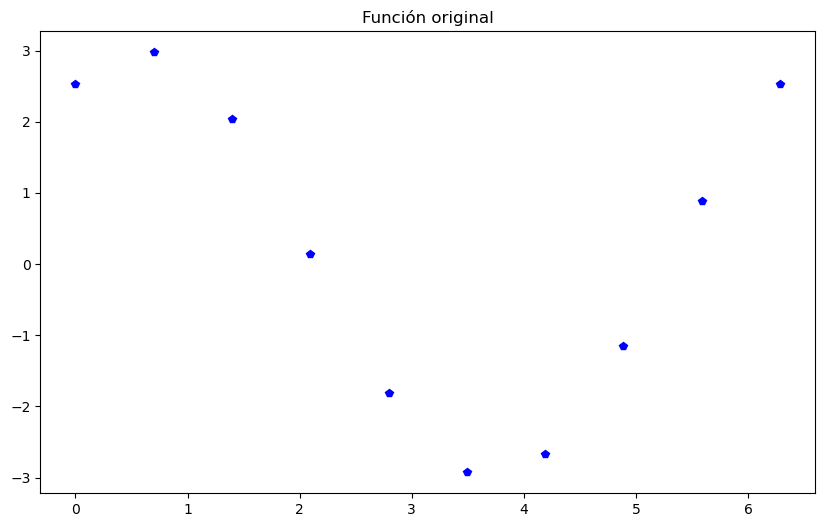

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,2*np.pi,10)
t= 3*np.sin(x+1)
plt.figure(figsize=(10, 6))
plt.plot(x, t, 'bp')
plt.title('Función original')

Primero para implementar la interpolación monomial por puntos igualmente espaciados tomamos los puntos de arriba, y generamos una función que calcule los coeficientes del polinomios de interpolación

In [21]:
def calcular_coeficientes(x, y):
    n = len(x)
    A = np.zeros((n, n))
    b = np.zeros(n)

    for i in range(n):
        for j in range(n):
            A[i, j] = x[i] ** j
        b[i] = y[i]

    coef = np.linalg.solve(A, b)
    return coef

coefi = calcular_coeficientes(x, t)

Ahora hacemos una función que nos ayude a evaluar el la interpolación

In [22]:
def evaluar_polinomio(coeficientes, x):
    y = np.zeros_like(x)
    for i in range(len(coeficientes)):
        y += coeficientes[i] * (x ** i)
    return y

Usamos las funciones

In [25]:
coeficientes = calcular_coeficientes(x, t)
y_interpolacion = evaluar_polinomio(coeficientes, x)

Hacemos la gráfica

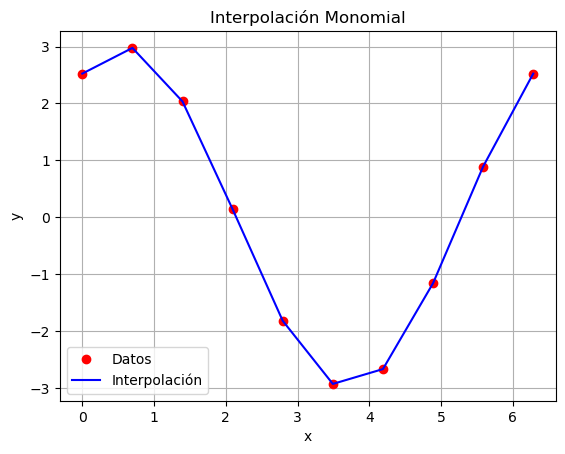

In [28]:
plt.plot(x, t, 'ro', label='Datos')
plt.plot(x, y_interpolacion, 'b-', label='Interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación Monomial')
plt.legend()
plt.grid(True)
plt.show()

Ahora, si usamos nodos de Chebyshev

In [29]:
def nodos_chebyshev(a, b, n):
    k = np.arange(1, n+1)
    return (a + b) / 2 + (b - a) / 2 * np.cos((2*k - 1) * np.pi / (2*n))

def evaluar_polinomio_chebyshev(coeficientes, nodos):
    grado = len(coeficientes) - 1
    y = np.zeros_like(nodos)
    for i in range(grado + 1):
        y += coeficientes[i] * (nodos ** i)
    return y

Ahora usamos esta interpolacion

In [31]:
nodos = nodos_chebyshev(0, 2*np.pi, 10)
valores_interpolados = evaluar_polinomio_chebyshev(coeficientes, nodos)


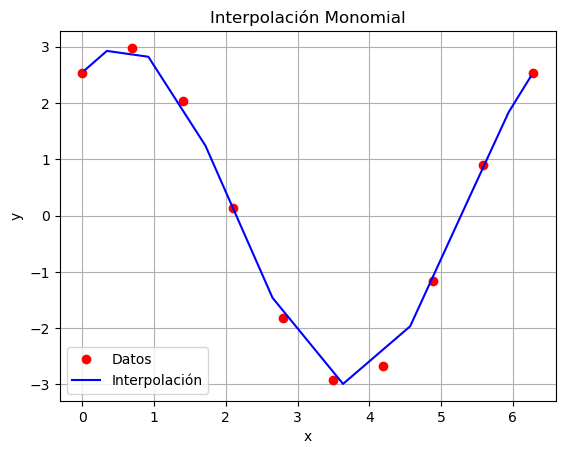

In [33]:
plt.plot(x, t, 'ro', label='Datos')
plt.plot(nodos, valores_interpolados, 'b-', label='Interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación Monomial')
plt.legend()
plt.grid(True)
plt.show()